In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
corona = pd.read_csv(r"./covid19_Confirmed_dataset.csv")
corona.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


data is imported and ready to go, next ill take a look at the data and do a little bit of preprossing/

In [91]:
corona.shape

(266, 104)

In [92]:
corona.drop(columns=["Lat","Long"],axis=1, inplace=True)

In [93]:
corona.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [94]:
newcorona = corona.groupby("Country/Region").sum()

In [95]:
newcorona.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [96]:
newcorona.shape

(187, 101)

187 countries and 101 dates

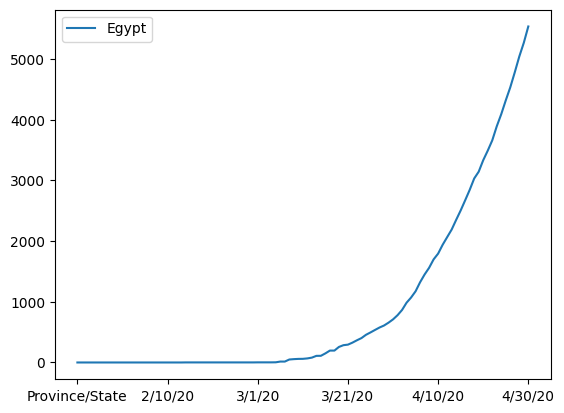

In [97]:
newcorona.loc['Egypt'].plot()
plt.legend()

<Axes: >

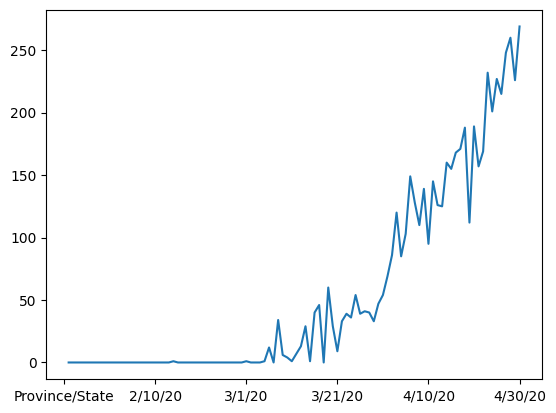

In [98]:
newcorona.loc['Egypt'].diff().plot()

this shows infection rate in egypt till 30-4-20

In [99]:
newcorona.loc['Egypt'].diff().max()

269

topped at 269 patients

In [100]:
newcorona = newcorona.apply(pd.to_numeric, errors='coerce')
newcorona = newcorona.fillna(0)


In [101]:
countries = list(newcorona.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(newcorona.loc[c].diff().max())
newcorona["max_infection_rate"] = max_infection_rates



    

In [102]:
corona_data = pd.DataFrame(newcorona["max_infection_rate"])
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [103]:
happy = pd.read_csv(r"./worldwide_happiness_report.csv")
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [104]:
useless = ["Overall rank","Score", "Generosity","Perceptions of corruption"]

happy.drop(useless, axis=1, inplace=True)
happy.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [105]:
newhappy = happy.groupby("Country or region").sum()
newhappy.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Afghanistan,0.350,0.517,0.361,0.000
Albania,0.947,0.848,0.874,0.383
Algeria,1.002,1.160,0.785,0.086
Argentina,1.092,1.432,0.881,0.471
Armenia,0.850,1.055,0.815,0.283


In [106]:
final = corona_data.join(newhappy, how="inner")
final.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [107]:
final.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

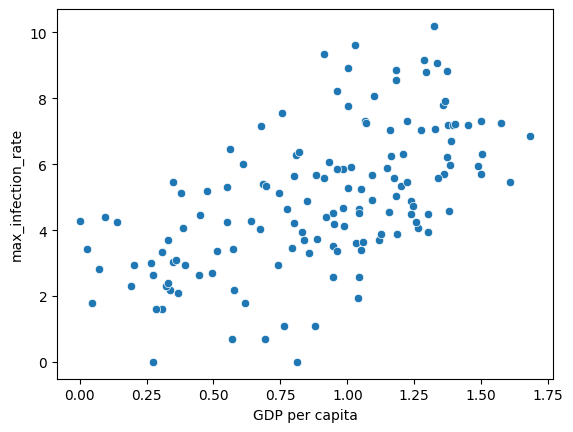

In [108]:
x= final["GDP per capita"]
y= final["max_infection_rate"]
sns.scatterplot(x=x, y=np.log(y))

what does this prove? 
it proves that the more the country is developed the more its prone to get infected by corono

or does it ? 
so i got another dataset to see if thats the case. 
its a dataset about the deathcases realted to corona virus.

In [109]:
deaths = pd.read_csv(r"./covid19_deaths_dataset.csv")
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


ill do the same thing i did with first dataset

In [110]:
useless = ["Lat","Long"]

deaths.drop(useless, axis=1, inplace=True)
deaths.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [111]:
newdeaths = deaths.groupby("Country/Region").sum()
newdeaths.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [112]:
newdeaths.shape

(187, 101)

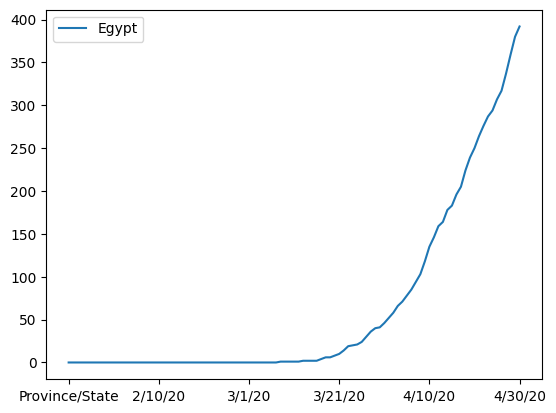

In [113]:
newdeaths.loc['Egypt'].plot()
plt.legend()

In [114]:
newdeaths = newdeaths.apply(pd.to_numeric, errors='coerce')
newdeaths = newdeaths.fillna(0)

In [115]:
countries = list(newdeaths.index)
max_deaths_rates = []

for c in countries:
    max_deaths_rates.append(newdeaths.loc[c].diff().max())

newdeaths["max_deaths_rate"] = max_deaths_rates

In [116]:
newdeaths.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_deaths_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0.0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0.0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0.0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0.0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [125]:
max_deaths = pd.DataFrame(newdeaths["max_deaths_rate"])
max_deaths.head()
final_data = max_deaths.join(newhappy, how="inner")
final_data.head()

,max_deaths_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


c:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


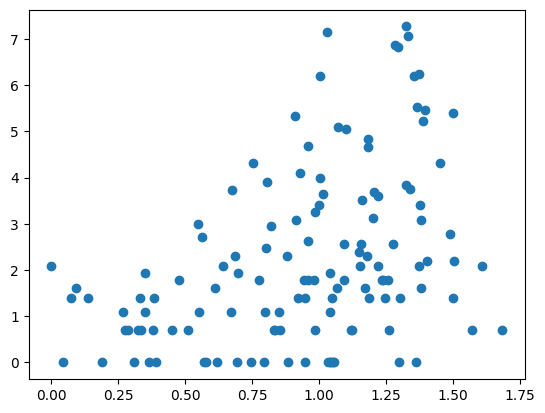

In [126]:
x = final_data["GDP per capita"]
y = final_data["max_deaths_rate"]
plt.scatter(x= x , y= np.log(y))
plt.show()

this doubles down on my question above, the answers is YES the more the developed a country is the more it is prone to covid , not due to insufficenet tests of covid taken in less develped contries.
Ty